In [37]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import json

import keras
#사전학습 모델
from keras.applications.vgg16 import VGG16, decode_predictions
from keras.applications.resnet import ResNet50
from keras.applications.inception_v3 import InceptionV3 


from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

#파이썬 표준 이미지 라이브러리
from PIL import ImageFont, ImageDraw, Image

#구글번역기
from googletrans import Translator  # pip install googletrans

# VGG16

아주 기본적인 이미지 분류 사전 학습 모델

In [38]:
model = VGG16(weights='imagenet')
model.summary() # 모델 네트워크 구조 보기

#conv2번에 pooling 1번
#필터 수가 2배로 계속 늘어나고 있음
#풀링을 반복해서 결국 영상 크기가 7 7로 바뀜
#flatten 으로 1차원으로 바꾸고
# 첫번째 히든층 4096 두번째 히든층 4096 출력층은 클래스가 1000개
# 학습해야하는 총 파라미터 138,357,544

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

고양이 인식해보기, 구글에서 이미지 가져와서 인식해봐도 된다

(224, 224, 3)


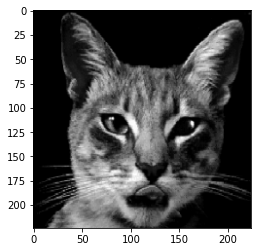

In [39]:
img_path = 'cat.png'  # naming.jpg   cat.png   mug.jpg

# 인풋사이즈는 224, 244이므로 바꿔주기
image = load_img(img_path, target_size=(224, 224)) 

plt.imshow(image)
x = img_to_array(image)  # image to numpy
print(x.shape)

In [40]:
x = np.expand_dims(x, axis=0) # 3차원이 아닌 4차원으로 변경(cnn은 4차원)
print(x.shape)

(1, 224, 224, 3)


In [41]:
x = keras.applications.vgg16.preprocess_input(x) #vgg16에 맞게 전처리
pred = model.predict(x) # 예측
print(pred.shape) # 샘플은 1개(고양이이미지) 클래스는 1000개

(1, 1000)


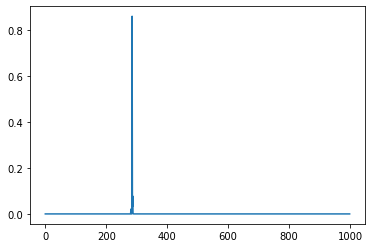

In [42]:
plt.plot(pred[0,:]) 

In [43]:
prob = np.max(pred, axis=1) 
id = np.argmax(pred, axis=1)
print(prob) # 여러 이미지를 인풋으로 넣는다는 가정하에 배열로 나온다
print(id)

[0.8583759]
[285]


In [44]:
print('Predicted:', decode_predictions(pred, top=3)[0])

Predicted: [('n02124075', 'Egyptian_cat', 0.8583759), ('n02127052', 'lynx', 0.07768085), ('n02125311', 'cougar', 0.030882899)]


# ResNet

ResNet사전학습 모델

In [45]:
modelResNet = ResNet50(weights='imagenet')
modelResNet.summary()

#입력은 224, 224, 컬러
# 네트워크 깊이가 매우 깊음
# 네트워크는 깊은데 총 파라미터는 25,636,712로 위 모델보다 줄음


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

Predicted: [('n02124075', 'Egyptian_cat', 0.59138983), ('n02123045', 'tabby', 0.31245267), ('n02123159', 'tiger_cat', 0.065630004)]


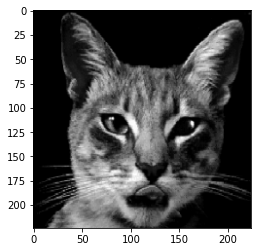

In [46]:
img_path = 'cat.png'
image = load_img(img_path, target_size=(224, 224))
plt.imshow(image)
x = img_to_array(image)  # to numpy
x = np.expand_dims(x, axis=0)
x = keras.applications.resnet.preprocess_input(x)
pred = modelResNet.predict(x)
print('Predicted:', decode_predictions(pred, top=3)[0])

# Inception_v3

In [47]:
modelInception = InceptionV3(weights='imagenet')
modelInception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
_______________________________________________________________________________________

(299, 299, 3)
(1, 299, 299, 3)
Predicted: [('n03187595', 'dial_telephone', 0.99849916), ('n03902125', 'pay-phone', 0.0008203745), ('n02492660', 'howler_monkey', 1.3452498e-05)]


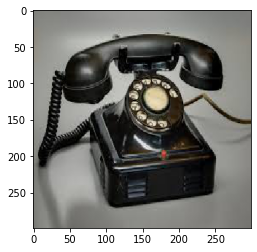

In [48]:
img_path = 'phone.jpg'
image = load_img(img_path, target_size=(299, 299)) #inception은 299 299인풋
plt.imshow(image)
x = img_to_array(image)  # to numpy
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)
x = keras.applications.inception_v3.preprocess_input(x) # 인셉션에 맞는 전처리
preds = modelInception.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

# OpenCV 연동

캠, 동영상 연동 위한 OpenCV연동

Predicted: [('n03187595', 'dial_telephone', 0.99987495), ('n03902125', 'pay-phone', 0.00012183194), ('n03602883', 'joystick', 8.5339116e-07)]


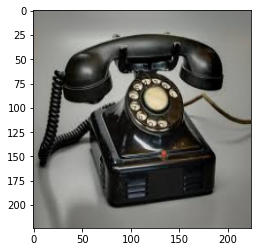

In [49]:
#img_path = 'elephant.jpg'
#img_path = 'mug.jpg'
#img_path = 'food.jpg'
img_path = 'phone.jpg'

#image = load_img(img_path, target_size=(224, 224))
#x = img_to_array(image)
#x = np.expand_dims(x, axis=0)

img = cv2.resize(cv2.imread(img_path), (224, 224))
imgrgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #cv는 bgr이므로 rgb로변환 
x = np.expand_dims(imgrgb, axis=0)

x = keras.applications.vgg16.preprocess_input(x) # 모델에 맞는 전처리

pred = model.predict(x)
print('Predicted:', decode_predictions(pred, top=3)[0])
plt.imshow(imgrgb)

# ImageNet 클래스 레이블링

레이블 데이터를 가져와 값을 출력

In [50]:
json_file = open("imagenet_class_index.json")
dict = json.load(json_file)  #json to python dictionary  
#print(dict)
print(dict['0'])

['n01440764', 'tench']


In [51]:
id = np.argmax(pred, axis=1)[0]
name = dict[str(id)][1] 
print(id, name)

528 dial_telephone


In [52]:
labels = []
for  i  in range(len(dict))  :
    word = dict[str(i)][1]    
    word = word.replace("_", " ")
    word = word.replace("-", " ")    
    labels.append(word)    
#print(labels)
print(labels[id])

dial telephone


In [53]:
#googletrans로 변역하려했는데 그냥 번역해왔다고 한다
with open("labels_h.txt", 'r', -1, 'utf-8') as f:    
     labels_h = f.read().splitlines()            
print(labels_h)       

['잉어의 일종', '금붕어', '백상아리', '범 상어', '귀상어', '전기 광선', '가오리', '수탉', '대단히', '타조', '되새', '금화', '하우스 핀치', '돌진', '인디고 멧', '남자 이름', '벌벌', '어치', '까치', '박새 속의 총칭', '물 까마귀', '연', '흰머리 독수리', '무자비한 사람', '큰 회색 올빼미', '유럽 \u200b\u200b화재 도롱뇽', '일반적인 영원', '이다', '발견 도롱뇽', '아 홀로 틀', '황소 개구리', '청개구리', '꼬리 개구리', '얼간이', '장수 거북', '진흙 거북', '후미 거북', '상자 거북', '줄무늬 도마뱀', '일반 이구아나', '미국의 카멜레온', '채찍 꼬리', '종교', '주름 장식 도마뱀', '악어 도마뱀', '길라 몬스터', '녹색 도마뱀', '아프리카 카멜레온', '코모도 왕 도마뱀', '아프리카 악어', '미국 악어', '트리케라톱스', '천둥 뱀', 'ringneck 뱀', 'hognose 뱀', '녹색 뱀', '왕 뱀', '가터 뱀', '물뱀', '포도 나무 뱀', '밤 뱀', '보아', '바위 파이썬', '인도 코브라', '그린 맘바', '바다 뱀', '뿔 독사', '다이아몬드', '사이드 와인 더', '삼엽충', 'harvestman입니다', '투석기', '블랙과 골드 정원 거미', '어린이 거미', '정원 거미', '블랙 위도우', '타란툴라 거미', '늑대 거미', '진드기', '지네', '블랙 그 라우스', '멧닭', '목도리 뇌조', '뇌조의 일종', '공작', '메추라기', '자고', '아프리카 회색', '앵무새', '유황 볏이 앵무새', '진훙 잉꼬의 일종', '코 칼류', '꿀벌 먹는 사람', '코뿔새', '벌새', 'Jasmer', '큰 부리 새', '드레이크', '붉은 가슴 비오리', '거위', '검은 백조', '큰 엄니가있는 동물', '가시 두더지', '오리너구리', '왈라비', '주머니 곰 코알라', '웜뱃', '해파리',

Predicted: coffee mug 커피 잔 0.77574694


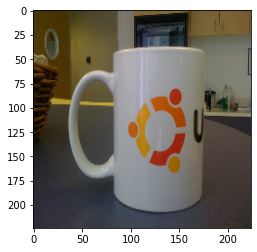

In [54]:
img_path = 'mug.jpg'

img = cv2.resize(cv2.imread(img_path), (224, 224))
imgrgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
x = np.expand_dims(imgrgb, axis=0)

x = keras.applications.vgg16.preprocess_input(x)

pred = model.predict(x)
id = np.argmax(pred, axis=1)[0]
prob = np.max(pred, axis=1)[0]
print('Predicted:', labels[id], labels_h[id], prob) #한글로 출력
plt.imshow(imgrgb)

# 이미지에 글자 출력

이미지에 한글 출력 하는 방법

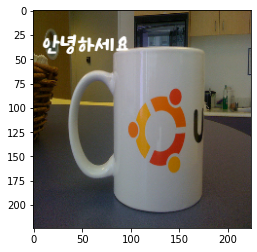

In [30]:
img_path = 'mug.jpg'
img = cv2.resize(cv2.imread(img_path), (224, 224))
imgrgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    

# 파이썬 표준 이미지 라이브러리 사용
image = Image.fromarray(imgrgb) 
draw = ImageDraw.Draw(image)
# 10, 20 위치에 20의폰트사이즈로 폰트를 가져와 255 255 255 색으로 출력
draw.text((10, 20), "안녕하세요", font=ImageFont.truetype("KCCMurukmuruk.ttf", 20), fill=(255,255,255))
plt.imshow(image)

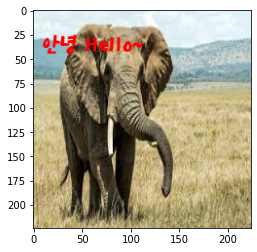

In [31]:
# 함수화하자
def drawText(img, x, y, text, size, color) :
    image = Image.fromarray(imgrgb)
    draw = ImageDraw.Draw(image)
    draw.text((x, y), text, font=ImageFont.truetype("KCCMurukmuruk.ttf", size), fill=color)
    return image

img_path = 'elephant.jpg'
img = cv2.resize(cv2.imread(img_path), (224, 224))
imgrgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

image = drawText(imgrgb,  10, 20, "안녕 Hello~", 20, (255,0,0))
plt.imshow(image)

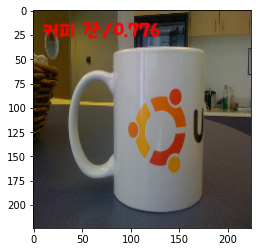

In [32]:
img_path = 'mug.jpg'
img = cv2.resize(cv2.imread(img_path), (224, 224))
imgrgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
x = np.expand_dims(imgrgb, axis=0)
x = keras.applications.vgg16.preprocess_input(x)


preds = model.predict(x)
id = np.argmax(preds, axis=1)[0]
prob = np.max(preds, axis=1)[0]
label = labels_h[id]

image = drawText(imgrgb,  10, 5, f"{label}/{prob:.3f}", 20, (255,0,0))

plt.imshow(image)

# 동영상 

In [33]:
# 컴퓨터와 연결된 0번째 카메라를 입력으로 사용, 동영상 이름을 넣어주면 동영상을 인풋으로
capture = cv2.VideoCapture(0) 

capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True: 
    #ret은 캡쳐한 이미지가 있을경우 true
    #frame은 640 480의 칼라 이미지가 들어온다
    ret, frame = capture.read() # 한장한장 카메라로부터 이미지를 받아온다

    img = cv2.resize(frame, (224, 224)) # 캡쳐한 이미지를 리사이징    
    cv2.imshow("VideoFrame", img) # 출력
    
    if cv2.waitKey(1) == ord('q'): break # q를눌러 나오기

capture.release()
cv2.destroyAllWindows()

[ WARN:0] global /tmp/pip-req-build-h45n7_hz/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.5.4-dev) /tmp/pip-req-build-h45n7_hz/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
# 위 예제를 이용해 캡쳐한 이미지를 사전학습모델로 인식해보기
capture = cv2.VideoCapture(0)

capture.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True: 
    ret, frame = capture.read()    
    img = cv2.resize(frame, (224, 224))
    imgrgb =  cv2.cvtColor(img, cv2.COLOR_BGR2RGB)    
    x = np.expand_dims(imgrgb, axis=0)
    x = keras.applications.vgg16.preprocess_input(x)
    
    
    preds = model.predict(x)
    id = np.argmax(preds, axis=1)[0]
    prob = np.max(preds, axis=1)[0]    
    
    label = labels_h[id]
    tmp = drawText(imgrgb,  10, 5, f"{label}/{prob:.3f}", 20, (255,0,0))
    imgrgb = np.array(tmp)    
    image =  cv2.cvtColor(imgrgb, cv2.COLOR_RGB2BGR)        
    cv2.imshow("VideoFrame", image)
    
    if cv2.waitKey(1) == ord('q'): break

capture.release()
cv2.destroyAllWindows()

## 영어레이블 한글로 번역

In [55]:
translator  = Translator()

In [56]:
res = translator.translate("hello", dest='ko')
print(res)
print(res.text)

Translated(src=en, dest=ko, text=안녕하십니까, pronunciation=annyeonghasibnikka, extra_data="{'confiden...")
안녕하십니까


In [36]:
res = translator.translate(["test", "happy"], dest='ko')
print(res)
print(len(res))
print(res[0].text)
print(res[1].text)

TypeError: the JSON object must be str, bytes or bytearray, not NoneType

In [ ]:
res = translator.translate(labels[0:50], dest='ko')   

In [ ]:
for r in res :
    print(r.text)

In [ ]:
a = [1,2,3]
a.extend([4,5,6])
print(a)

In [ ]:
labels_h = []   # 출력, 다음숫자부터
translator  = Translator()
for  i  in range(16, 20) :    
    res = translator.translate(labels[i*50:(i+1)*50], dest='ko')   
    for r in res :
        labels_h.append(r.text)
    print(i)
print(labels_h)

In [ ]:
with open("labels.txt", "w") as outfile:
    outfile.write("\n".join(labels))
with open("labels_h.txt", "w",  -1, 'utf-8') as outfile:
    outfile.write("\n".join(labels_h))    

In [ ]:
with open("labels.txt", 'r') as f:    
     labels2 = f.read().splitlines()    
with open("labels_h.txt", 'r', -1, 'utf-8') as f:    
     labels_h2 = f.read().splitlines()            
#print(labels2)        
#print(labels_h2)        